<a href="https://colab.research.google.com/github/Khomiakov7706/requirements_analysis/blob/develop/eda_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Содержание
* [1  Описание Задачи](#1)
    * [1.1  Описание установки](#1.1)
    * [1.2  Бизнес-проблема](#1.2)
    * [1.3  Метрики](#1.3)
    * [1.4  Описание данных](#1.4)
    * [1.5  Структура данных](#1.5)
* [2  Анализ данных](#2)
    * [2.1  Загрузка данных](#2.1)
    * [2.2  Обобщенная информация о данных](#2.2)
* [3  Выводы](#3)

<a id="1"></a>
# 1 Описание Задачи

<a id="1.1"></a>
## 1.1 Описание общего бизнес-процесса

**Процесс управления требованиями**
состоит из нескольких основных этапов:


1. Сбор 
2. Формализация 
3. Анализ 
4. Классифкаиця требований (по главам)
5. Планирование требований (соотнесение требований с элементами АЭС)
6. Трассировка требований (отслеживание реализации требований)



<a id="1.2"></a>
## 1.2 Бизнес-проблема

В настоящее время классификация требований производится вручную при помощи экспертов из проектного блока. Занимает порядка нескольких месяцев на критическом пути Проекта и несколько тысяч человеко-часов экспертов из Проектного блока.

Предлагается внедрить модель машинного обучения, которая будет осуществлять предварительную классификацию требований.

<a id="1.3"></a>
## 1.3 Метрики

- Гармоническое среднее между точностью и полнотой
 
 $$Precision = \frac{TP}{TP+FP}$$
 
 $$Recall = \frac{TP}{TP+FN}$$
 
 $$F1 = \frac{2 * precision * recall}{precision + recall}$$
 
 
 - Средняя точность по оценкам прогнозов
 
 $$AP = \sum\limits _{n}{(R_n-R_{n-1})*P_n}$$
 где \\( P_n\\) - точность на **n**-пороге, \\( R_n\\) - полнота на **n**-пороге.

Так же, для сравнение результатов работы алгоритма, можно рассмотреть метрики описанные в https://github.com/waico/SKAB/blob/master/utils/evaluating.py. 

# Анализ данных

In [174]:
 #@title libraries
import os
import sys
import pandas as pd
import numpy as np
import datetime
from matplotlib import pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown
from itertools import chain

#NLP libraries
from nltk.tokenize import word_tokenize
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from collections import Counter


plt.rcParams.update({'figure.max_open_warning': 0})

In [175]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [176]:
#@title max columns display
pd.set_option('display.max_colwidth',1000)

In [177]:
#@title max rows display
pd.set_option('display.max_columns', 500)

<a id="1.4"></a>
## 1.4 Описание данных

In [178]:
#@title Data URL. { display-mode: "form" }
data_url = 'https://raw.githubusercontent.com/Khomiakov7706/requirements_analysis/main/train_test_withcols1.csv' #@param {type: 'string'}

In [179]:
#@title Read file with Software requirments via the link *data_url*

data = pd.read_csv(data_url)

<a id="1.5"></a>
## 1.5 Data structure

In [180]:
#@title Initial look at the dataset
data.head(2)

,req_no,requirement,req_type,test_scenario,Verification of Account Details and Settings,Verification of the Authentication and Authorization process,Verification of Contact Details,Verification of Customer Support,Verification of Data Integrity and Consistency,Verification of Design and Content,Verification of Downloads,Verification of Error Handling,Verification of Features and Functions,Verification of Forms and Validation of Input,Verification of Home Page,Verification of Language Compatibility,Verification of Links,Verification of Navigation,Verification of Notifications and Alerts,Verification of Password Policy and Setup,Verification of the Payment flow and details,Verification of Performance,Verification of the Product Page and Products,Verification of Search and Search Engine Optimization(SEO),Verification of Security and Privacy Policy Set Up,Verification of Social Media Links and Icons,Verification of Supportability and Device Compatibility,Verification of Usability and Accessibility,Verification of all Web Pages in the website,"Verification of Integration, Maintenance of the System and Web Standards"
0,1,System shall allow users to update their billing and contact information via the “My Account” section of the website,"['account','contact','feature & function']","['Verification of Account Details and Settings' , 'Verification of Contact Details' , 'Verification of Features and Functions']",1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,View User profile information,"['account','design & content','feature & function']","['Verification of Account Details and Settings' , 'Verification of Design and Content' , 'Verification of Features and Functions']",1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


В начальном файле есть 2 колонки, которые мы не будем использовать, потому что они являются результатом классификации, а не параметром.

req_type

test_scenario

###Изменение заголовков таблицы, выброс ненужных столбцов

In [181]:
#@title remove frase 'Verification of ' from requirements classes titles
# Iterate over the columns in the DataFrame
for column in data.columns:
    # Replace the phrase "Verification of " with an empty string
    new_column_name = column.replace("Verification of ", "")
    
    # Rename the column in the DataFrame
    data.rename(columns={column: new_column_name}, inplace=True)

In [182]:
data.rename(columns={'the Authentication and Authorization process': 'Authentication and Authorization',
                     'the Payment flow and details': 'Payment flow and details',
                     'the Product Page and Products': 'Product Page and Products',
                     'Security and Privacy Policy Set Up': 'Security and Privacy Policy',
                     'Integration, Maintenance of the System and Web Standards': 'Integration'
                     }, inplace=True)


In [183]:
data = data.drop(columns={'req_type',
                          'test_scenario',
                          'Social Media Links and Icons',
                          'all Web Pages in the website'}, axis=1)

In [184]:
data = data.rename(columns={'requirement': 'requirement_text'})

In [185]:
data.head(2)

,req_no,requirement_text,Account Details and Settings,Authentication and Authorization,Contact Details,Customer Support,Data Integrity and Consistency,Design and Content,Downloads,Error Handling,Features and Functions,Forms and Validation of Input,Home Page,Language Compatibility,Links,Navigation,Notifications and Alerts,Password Policy and Setup,Payment flow and details,Performance,Product Page and Products,Search and Search Engine Optimization(SEO),Security and Privacy Policy,Supportability and Device Compatibility,Usability and Accessibility,Integration
0,1,System shall allow users to update their billing and contact information via the “My Account” section of the website,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,View User profile information,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Dataset состоит из 2 основных колонок и 26 дополнительных:

*req_no* – номер требования

*requirement* – текст требования

*req_type* – тип требования – перечень классов, с которыми ассоциируется то или иное требование

*test_scenario* – Сценарий тестирования – соответсвует классу требования

Остальные колонки являются разметкой отношения требованиq к тому или иному классу

In [186]:
# Add a new column 'classes_count' to 'data'
data['classes_count'] = data.iloc[:, 2:].astype(bool).sum(axis=1)

In [187]:
display(Markdown('<br>__Requirements, that do not fit into any requirement class:__'))
data[data['classes_count'] == 0].iloc[0].count()

<br>__Requirements, that do not fit into any requirement class:__

27

In [188]:
#@title Delete rows with 'classes_count' < 1
data = data[data['classes_count'] >= 1]

In [189]:
#@title glance at Requirement classes in dataseet
requirement_classes = list(data.columns[2:-1].values)
for cl in requirement_classes:
  print(cl)

Account Details and Settings
Authentication and Authorization
Contact Details
Customer Support
Data Integrity and Consistency
Design and Content
Downloads
Error Handling
Features and Functions
Forms and Validation of Input
Home Page
Language Compatibility
Links
Navigation
Notifications and Alerts
Password Policy and Setup
Payment flow and details
Performance
Product Page and Products
Search and Search Engine Optimization(SEO)
Security and Privacy Policy
Supportability and Device Compatibility
Usability and Accessibility 
Integration


# Initial data analysis and preprocessing

## Обобщенная информация о данных

In [190]:
display(Markdown('<br>__Количество экспериментов в каждой группе:__'))
print('Количество требований: ', len(data))
print ('Количество классов требований: ', len(requirement_classes))

<br>__Количество экспериментов в каждой группе:__

Количество требований:  1377
Количество классов требований:  24


In [191]:
data.describe()

,req_no,Account Details and Settings,Authentication and Authorization,Contact Details,Customer Support,Data Integrity and Consistency,Design and Content,Downloads,Error Handling,Features and Functions,Forms and Validation of Input,Home Page,Language Compatibility,Links,Navigation,Notifications and Alerts,Password Policy and Setup,Payment flow and details,Performance,Product Page and Products,Search and Search Engine Optimization(SEO),Security and Privacy Policy,Supportability and Device Compatibility,Usability and Accessibility,Integration,classes_count
count,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000
mean,694.885984,0.015251,0.100944,0.024691,0.020334,0.037037,0.210603,0.017429,0.037763,0.236020,0.041394,0.025418,0.021786,0.084967,0.045025,0.032680,0.024691,0.036311,0.075527,0.035585,0.080610,0.097313,0.061728,0.068991,0.125635,1.557734
std,402.630810,0.122592,0.301364,0.155239,0.141192,0.188921,0.407885,0.130912,0.190692,0.424789,0.199273,0.157447,0.146039,0.278934,0.207435,0.177862,0.155239,0.187130,0.264335,0.185319,0.272334,0.296491,0.240749,0.253530,0.331558,0.919610
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,345.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,696.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1044.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,1390.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000


<a id="2.2.1"></a>
### 2.2.1 Среднее количество слов в требовании

In [192]:
round(data['requirement_text'].str.split(" ").apply(len).mean())

19

<a id="2.2.4"></a>
### 2.2.4 Пропуски и выбросы в данных, шум
Не всегда пропуски в данных можно определить методом pandas isna(). Пропуски в данных могут обозначаться 0 или другими значениями. Оценим наличие пропусков и выбросов с помощью графиков.

In [193]:
data.requirement_text.apply(pd.isna).value_counts()

False    1377
Name: requirement_text, dtype: int64

в полученном dataset нет пропущенных значений

<a id="2.2.4.1"></a>

---


#### 2.2.4.1 анализ классов требований
Для оценки пропусков, выбросов и шумов выведем графики трендов для каждого сигнала

In [194]:
data.head()

,req_no,requirement_text,Account Details and Settings,Authentication and Authorization,Contact Details,Customer Support,Data Integrity and Consistency,Design and Content,Downloads,Error Handling,Features and Functions,Forms and Validation of Input,Home Page,Language Compatibility,Links,Navigation,Notifications and Alerts,Password Policy and Setup,Payment flow and details,Performance,Product Page and Products,Search and Search Engine Optimization(SEO),Security and Privacy Policy,Supportability and Device Compatibility,Usability and Accessibility,Integration,classes_count
0,1,System shall allow users to update their billing and contact information via the “My Account” section of the website,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
1,2,View User profile information,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
2,3,Password reminders and resets are handled by the website,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2
3,4,User accounts are password protected,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2
4,5,Account info change access,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [195]:
#data['number_of_classes'] = data.classes_count
#data.head()

(array([848., 384.,  97.,  22.,   0.,  14.,   8.,   1.,   2.,   1.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. , 5.8, 6.6, 7.4, 8.2, 9. ]),
 <BarContainer object of 10 artists>)

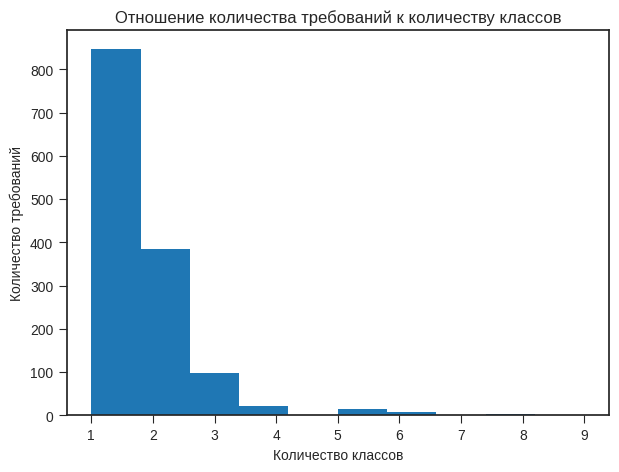

In [196]:
#@title график "Отношение количества требований к количеству классов"
plt.figure(figsize=(7,5))
plt.title('Отношение количества требований к количеству классов')
plt.xlabel('Количество классов')
plt.ylabel('Количество требований')
plt.hist(data.classes_count,bins=10)

In [197]:
data.classes_count.value_counts()

1    848
2    384
3     97
4     22
5     14
6      8
8      2
9      1
7      1
Name: classes_count, dtype: int64

Большинство требований (845) относится к 1 классу,
к 2 классам относится 384 требований.
К 7, 9 классам отноится по 1 требованию.

<ipython-input-198-441ae563b0e1>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-ticks')


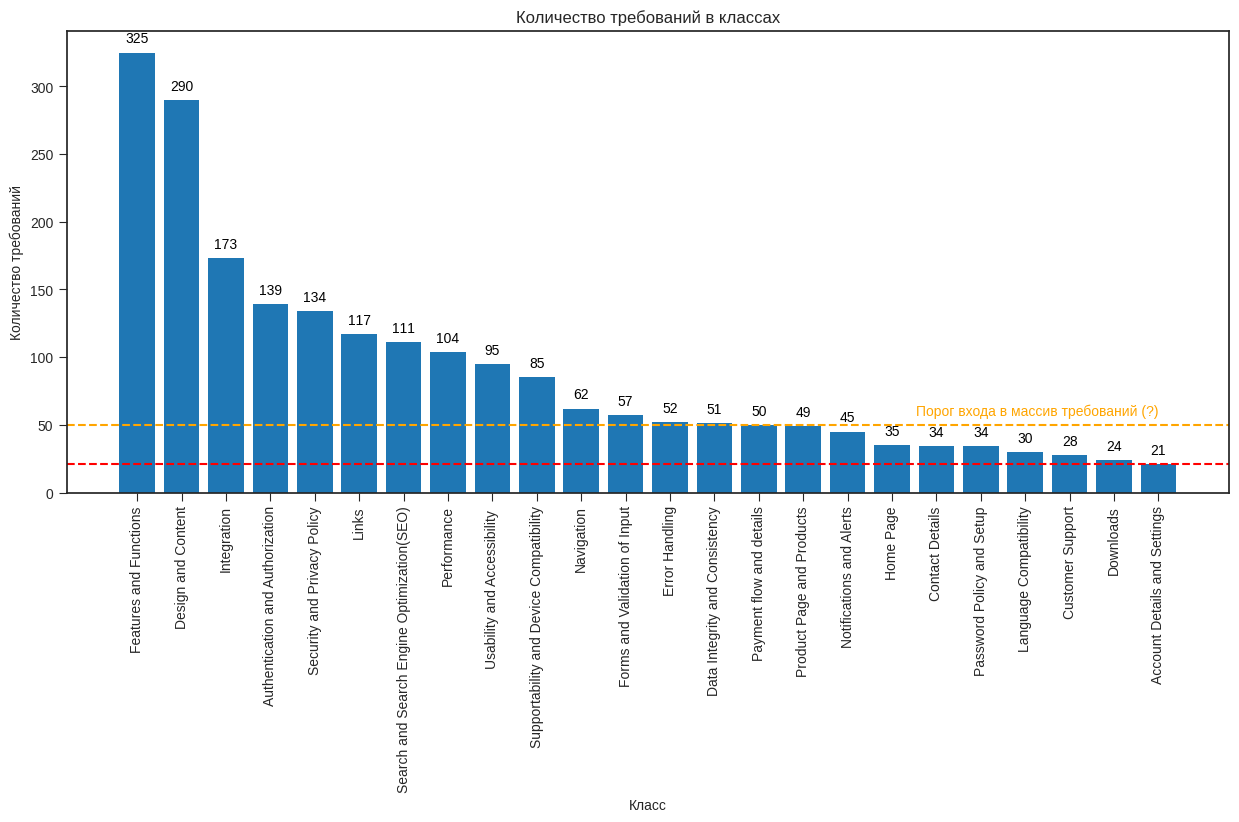

In [198]:
#@title Bar chart of requirements 

plt.figure(figsize=(15,6))
plt.style.use('seaborn-ticks')
plt.xticks(rotation=90)

names = data.columns[2:-1]
values = data.iloc[:,2:-1].sum(axis=0)

# Sort names and values in descending order
sorted_indices = values.argsort()[::-1]
names = names[sorted_indices]
values = values[sorted_indices]

plt.bar(names,values)
plt.title('Количество требований в классах')

# Add labels for overall number of requirements above each bar
for i, (name, value) in enumerate(zip(names, values)):
    plt.text(i, value + 5, str(value), ha='center', va='bottom', color='black') 


plt.axhline(y=50, color='orange', linestyle='--')  # Add a horizontal line at y=50
plt.text(len(names) - 1, 60, 
         s = 'Порог входа в массив требований (?)', 
         ha='right', 
         va='center', 
         color='orange')

plt.axhline(y=values.min(), color='red', linestyle='--')  # Add a horizontal line at y=50
#plt.text(len(names) - 1, 
#         y=values.min()+10, 
#         s = str('Минимальный размер класса требований: '+ str(values.min())), 
#         ha='right', 
#         va='center', 
#         color='red',
#         bbox=dict(facecolor='white', edgecolor='none', alpha=0.4))

plt.xlabel('Класс')
plt.ylabel('Количество требований')

plt.show()

In [199]:
data.loc[:,requirement_classes].sum(axis=0).sort_values(ascending=False)

Features and Functions                        325
Design and Content                            290
Integration                                   173
Authentication and Authorization              139
Security and Privacy Policy                   134
Links                                         117
Search and Search Engine Optimization(SEO)    111
Performance                                   104
Usability and Accessibility                    95
Supportability and Device Compatibility        85
Navigation                                     62
Forms and Validation of Input                  57
Error Handling                                 52
Data Integrity and Consistency                 51
Payment flow and details                       50
Product Page and Products                      49
Notifications and Alerts                       45
Home Page                                      35
Password Policy and Setup                      34
Contact Details                                34


В классах 
Verification of Features and Functions                                      325
Verification of Design and Content                                          290


заметно большее количество требований. 

## Лемматизация

In [200]:
#@title Lemmatizer definition
lemmatizer = WordNetLemmatizer()

In [201]:
#@title function removes pluralicity, tences etc.

def lemmatization(text):
    '''a function for lemmatization'''
    text = [lemmatizer.lemmatize(word.lower()) for word in text.split()]
    # joining the list of words with space separator
    return " ".join(text)

In [202]:
data['lemmatized_requirement'] = data['requirement_text'].apply(lemmatization)

In [203]:
data[['requirement_text','lemmatized_requirement']].head(2)

,requirement_text,lemmatized_requirement
0,System shall allow users to update their billing and contact information via the “My Account” section of the website,system shall allow user to update their billing and contact information via the “my account” section of the website
1,View User profile information,view user profile information


Убираем стоп-слова

In [204]:
from nltk.corpus import stopwords
import nltk


In [205]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [206]:
sw = stopwords.words('english')
len(sw)

179

In [207]:
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words 
    text = [word for word in text.split() if word not in sw]
    # joining the list of words with space separator
    return " ".join(text)

In [208]:
data['lemmatized_requirement'] = data['lemmatized_requirement'].apply(stopwords)

In [209]:
data[['requirement_text','lemmatized_requirement']].tail(1)

,requirement_text,lemmatized_requirement
1389,Data should be up to date and easily maintainable - or where up-to-date data is not available indication of how recent the data is.\r\nData should be validated to at least a basic level - the information should be validated (or its validation status indicated) by the organisation itself and an external authority should confirm that the organisation exists and the core information is correct. This is necessary to ensure that at a minimum that 1) at least users can begin to validate the information themselves via the organisations Web site and 2) that inappropriate organisations do not attempt to register as part of the directory.,data date easily maintainable - up-to-date data available indication recent data is. data validated least basic level - information validated (or validation status indicated) organisation external authority confirm organisation exists core information correct. necessary ensure minimum 1) least user begin validate information via organisation web site 2) inappropriate organisation attempt register part directory.


Убираем знаки препинания

In [210]:
import re
regex = re.compile('[^a-zA-Z а-яА-Я]')

In [211]:
data.lemmatized_requirement = data.lemmatized_requirement.apply(lambda x: regex.sub('',x))

In [212]:
data[['requirement_text','lemmatized_requirement']].tail(1)

,requirement_text,lemmatized_requirement
1389,Data should be up to date and easily maintainable - or where up-to-date data is not available indication of how recent the data is.\r\nData should be validated to at least a basic level - the information should be validated (or its validation status indicated) by the organisation itself and an external authority should confirm that the organisation exists and the core information is correct. This is necessary to ensure that at a minimum that 1) at least users can begin to validate the information themselves via the organisations Web site and 2) that inappropriate organisations do not attempt to register as part of the directory.,data date easily maintainable uptodate data available indication recent data is data validated least basic level information validated or validation status indicated organisation external authority confirm organisation exists core information correct necessary ensure minimum least user begin validate information via organisation web site inappropriate organisation attempt register part directory


#Data analysis

## Bag of words analysis

In [213]:
data['tokens'] = data['lemmatized_requirement'].apply(word_tokenize)

In [214]:
data['tokens'][:3]

0    [system, shall, allow, user, update, billing, contact, information, via, my, account, section, website]
1                                                                         [view, user, profile, information]
2                                                              [password, reminder, reset, handled, website]
Name: tokens, dtype: object

In [215]:
# Flatten the list of tokens
flattened_tokens = list(chain.from_iterable(data['tokens']))

# Create a Counter with lowercase tokens
bow = Counter(token.lower() for token in flattened_tokens)

# Print the 10 most common tokens
print(bow.most_common(10))

[('user', 475), ('shall', 361), ('page', 254), ('system', 201), ('website', 176), ('link', 168), ('product', 165), ('information', 155), ('must', 153), ('able', 135)]


In [216]:
all_words = data['lemmatized_requirement'].str.split(expand=True).unstack().value_counts()

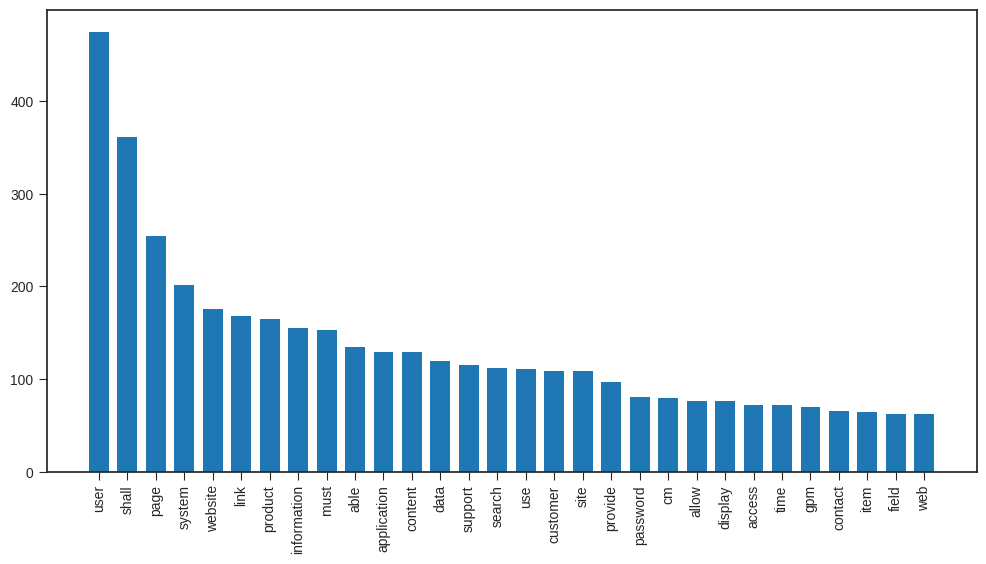

In [238]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)

mostCommonTokensNumber = 30 #@param 

# Get the most common 10 tokens and their frequencies
most_common_tokens = bow.most_common(mostCommonTokensNumber)
tokens = [token for token, _ in most_common_tokens]
frequencies = [frequency for _, frequency in most_common_tokens]

# Create the bar plot
plt.bar(tokens, frequencies, width=0.7)

plt.show()

### Посмотрим частоту вхождения слов в тексты требований в зависимости от класса

Сформируем словарь из 10 самых популярных слов для каждого класса

In [239]:
class_dict = dict()
for c in range(len(requirement_classes)):
    class_dict[requirement_classes[c]] = data[data[requirement_classes[c]]==1]['lemmatized_requirement'].str.split(expand=True).unstack().value_counts().head(mostCommonTokensNumber)

In [240]:
class_dict['Integration']

shall          60
system         45
product        38
application    33
user           33
website        31
use            27
must           25
data           24
page           23
r              21
software       20
database       20
content        20
support        19
management     16
new            16
requirement    16
update         15
standard       14
priority       14
web            14
time           13
server         13
allow          13
information    13
code           12
cm             12
file           11
site           11
dtype: int64

In [241]:
class_dict[requirement_classes[0]].index[0]

'user'

In [245]:
#@title bar chart with most common words per class
wordsPerClassOnChart = 15 #@param 

<ipython-input-247-d65f4e4cdd6e>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(class_dict[requirement_class].index, rotation=90)


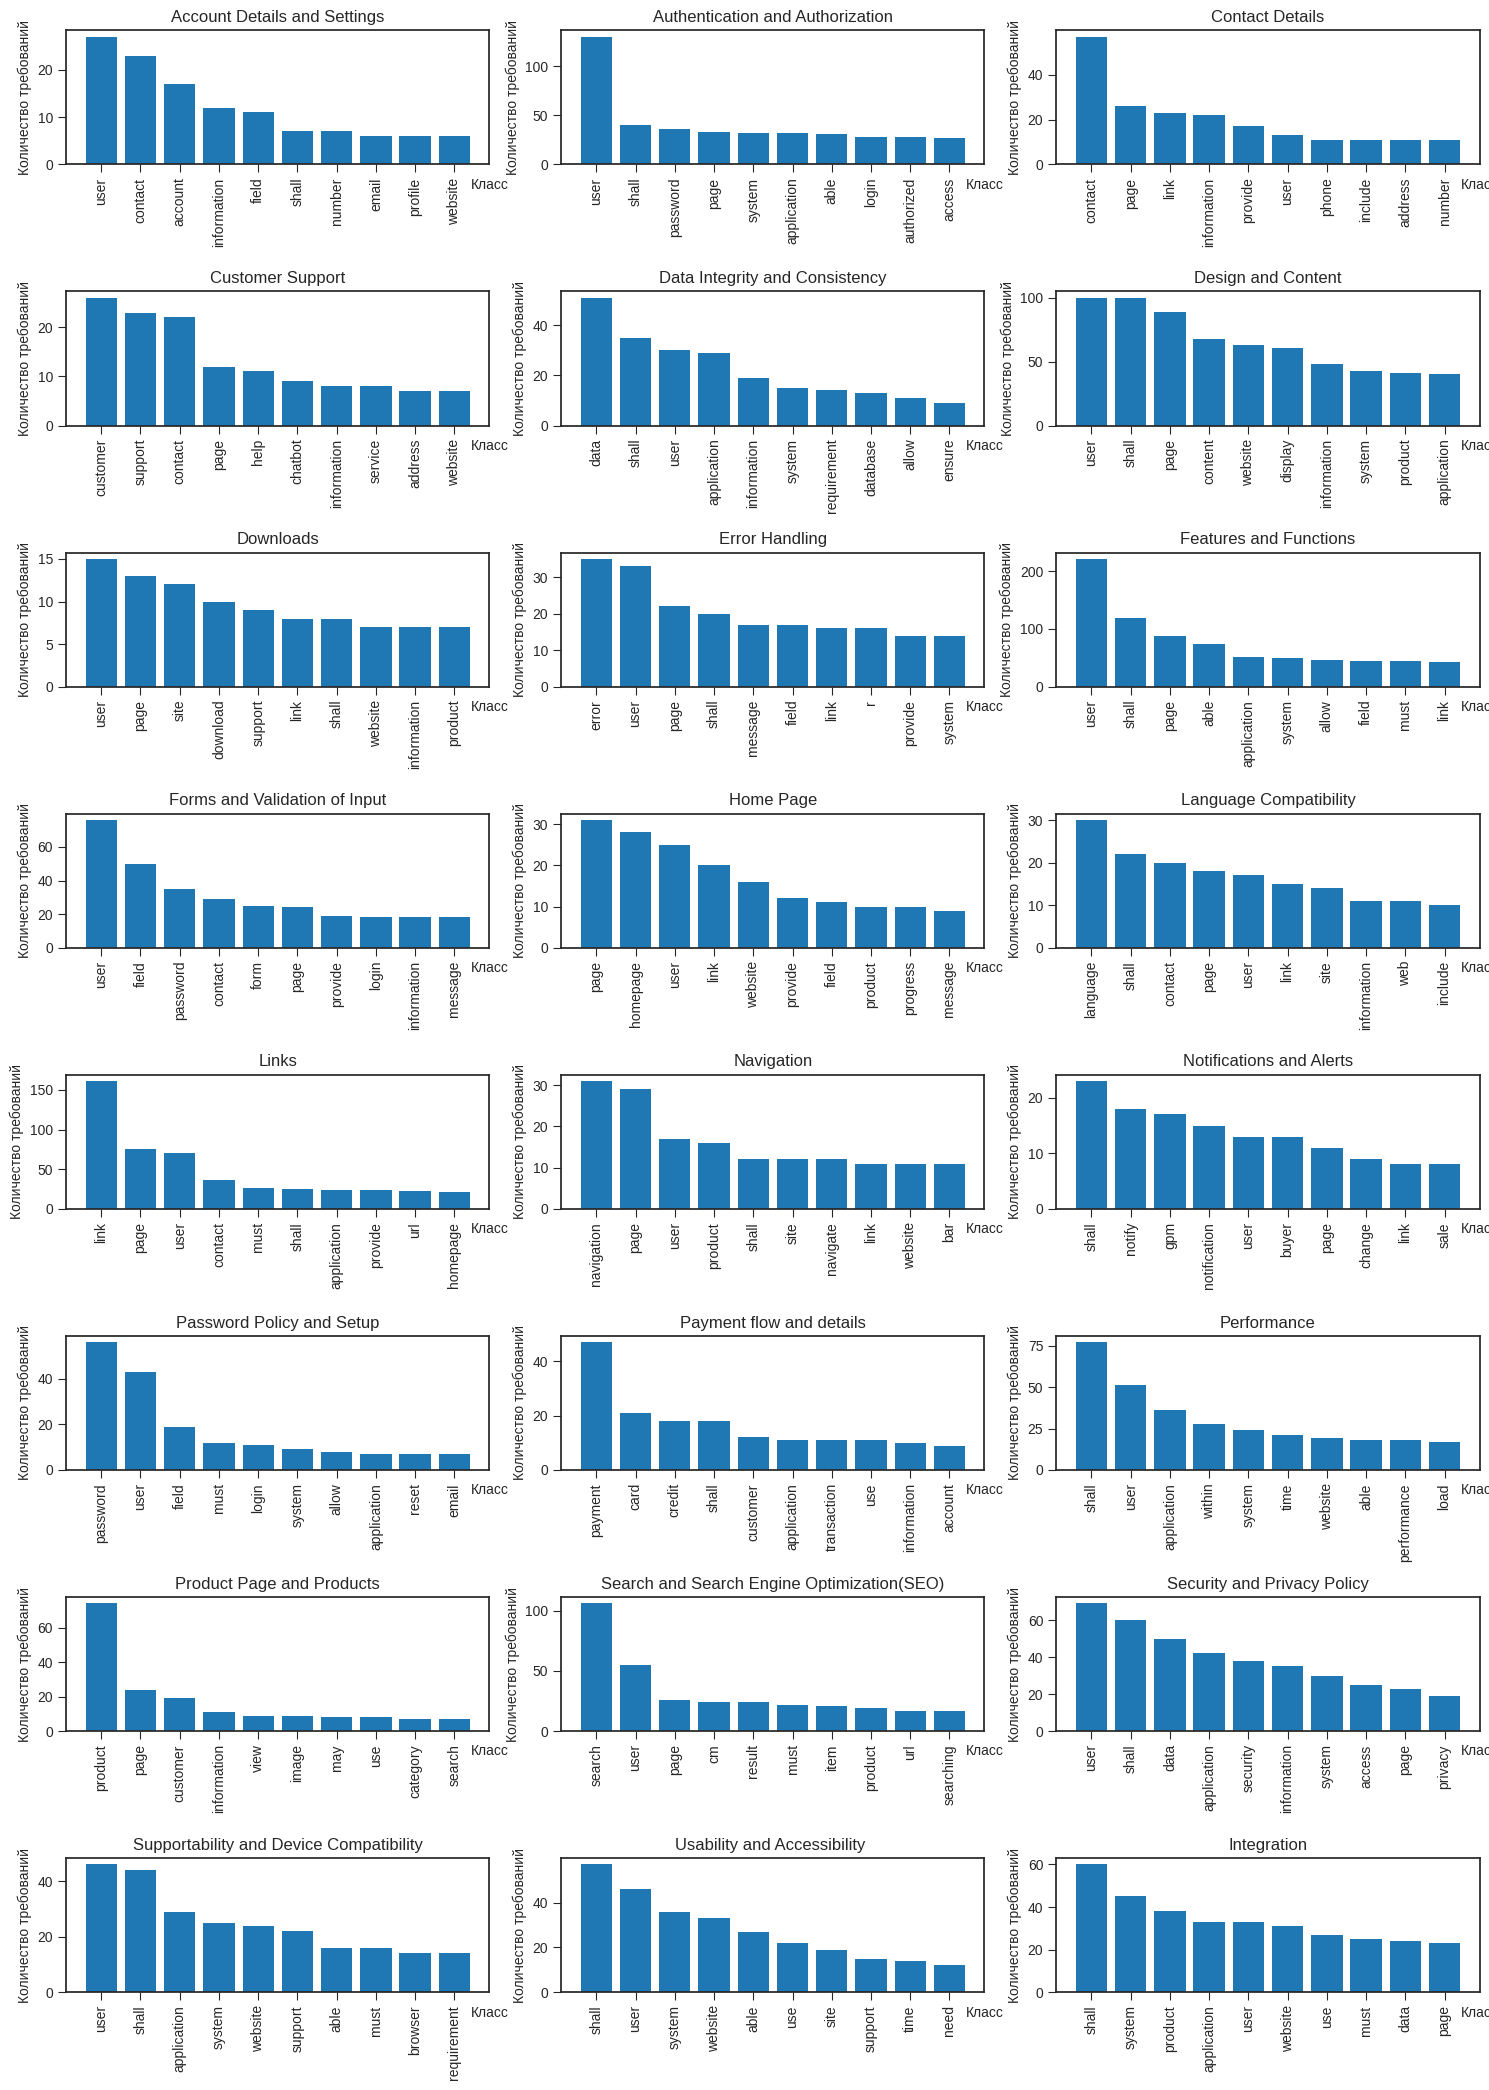

In [247]:
fig, axs = plt.subplots(8, 3, figsize=(15, 21))  # Adjust the grid size as needed
#fig.subplots_adjust(hspace=1.5)  # Adjust the vertical spacing between subplots

for i, requirement_class in enumerate(requirement_classes):
    ax = axs[i // 3, i % 3]  # Calculate the position of the subplot in the grid

    ax.bar(class_dict[requirement_class].index[:wordsPerClassOnChart], class_dict[requirement_class][:wordsPerClassOnChart])
    ax.set_xticklabels(class_dict[requirement_class].index, rotation=90)
    ax.set_title(requirement_class)
    ax.set_xlabel('Класс')
    ax.xaxis.set_label_coords(1, -0.1)
    ax.set_ylabel('Количество требований')

plt.tight_layout()
plt.show()

In [248]:
bag_of_words = []
for i in requirement_classes:
    for j in class_dict[i].index:
        if not (j in bag_of_word):
            bag_of_word.append(j)
display(bag_of_word[:15])

['user',
 'contact',
 'account',
 'information',
 'field',
 'shall',
 'number',
 'email',
 'profile',
 'website',
 'include',
 'phone',
 'address',
 'id',
 'password']

In [223]:
#data.loc[[1],['lemmatized_requirement']].str()

Добавляем пробелы в начало и конецтекста, чтобы анализировать все выделяемые пробелом в тексте  слова

In [224]:
data['lemmatized_requirement'] = data['lemmatized_requirement'].apply(lambda x: str(' '+ x + ' '))

In [225]:
data.lemmatized_requirement.head(2)

0     system shall allow user update billing contact information via my account section website 
1                                                                 view user profile information 
Name: lemmatized_requirement, dtype: object

In [249]:
bow = data[['requirement_text','lemmatized_requirement']]
for word in bag_of_words:
    bow[word]=data['lemmatized_requirement'].apply(lambda x: x.count(str (' ' + word + ' ')))

In [250]:
data.head()

,req_no,requirement_text,Account Details and Settings,Authentication and Authorization,Contact Details,Customer Support,Data Integrity and Consistency,Design and Content,Downloads,Error Handling,Features and Functions,Forms and Validation of Input,Home Page,Language Compatibility,Links,Navigation,Notifications and Alerts,Password Policy and Setup,Payment flow and details,Performance,Product Page and Products,Search and Search Engine Optimization(SEO),Security and Privacy Policy,Supportability and Device Compatibility,Usability and Accessibility,Integration,classes_count,lemmatized_requirement,tokens,user,contact,account,information,field,shall,number,email,profile,website,include,phone,address,id,password,form,u,page,throw,numbers,link,characters,view,create,change,message,validation,telephone,access,transaction,system,application,able,login,authorized,must,register,use,data,log,administrator,support,allow,verify,cm,site,person,buyer,registration,content,provide,detail,resume,company,way,customer,easily,channel,every,including,different,language,respond,help,chatbot,service,customers,video,add,etc,make,answer,product,always,reduce,question,social,query,requirement,database,ensure,stored,display,document,file,table,encrypted,column,eg,update,integrity,organisation,card,party,personal,image,date,web,text,color,description,download,downloadable,downloads,search,applicant,warranty,job,downloaded,selling,report,error,r,failure,priority,name,one,button,server,without,reported,go,see,api,item,click,tutorial,enter,type,homepage,progress,home,instructor,bar,tab,depicts,overview,default,logo,option,linked,available,several,english,url,links,privacy,navigation,navigate,main,menu,easy,component,area,category,clear,menus,notify,gpm,notification,sale,enable,auction,owner,security,future,notified,credit,method,creating,bidder,editing,officer,via,reset,session,never,users,new,payment,gateway,processor,may,process,pay,within,time,performance,load,second,seconds,simultaneous,fast,per,find,similar,show,listing,price,result,searching,title,results,tag,returned,related,seo,policy,secure,control,browser,firefox,run,internet,work,chrome,browsers,version,mobile,need,class,interface,operate,software,management,standard,code
0,1,System shall allow users to update their billing and contact information via the “My Account” section of the website,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,system shall allow user update billing contact information via my account section website,"[system, shall, allow, user, update, billing, contact, information, via, my, account, section, website]",1,1,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,View User profile information,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,view user profile information,"[view, user, profile, information]",1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,Password reminders and resets are handled by the website,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,password reminder reset handled website,"[password, reminder, reset, handled, website]",0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [228]:
features = data[requirement_classes]

In [229]:
#data.loc[1385,'lemmatized_requirement']

**Визуализация общих слов**

In [230]:
all_words = data['lemmatized_requirement'].str.split(expand=True).unstack().value_counts()


In [231]:
all_words

user             475
shall            361
page             254
system           201
website          176
                ... 
listen             1
follows            1
names              1
consideration      1
abroad             1
Length: 2728, dtype: int64

<BarContainer object of 30 artists>

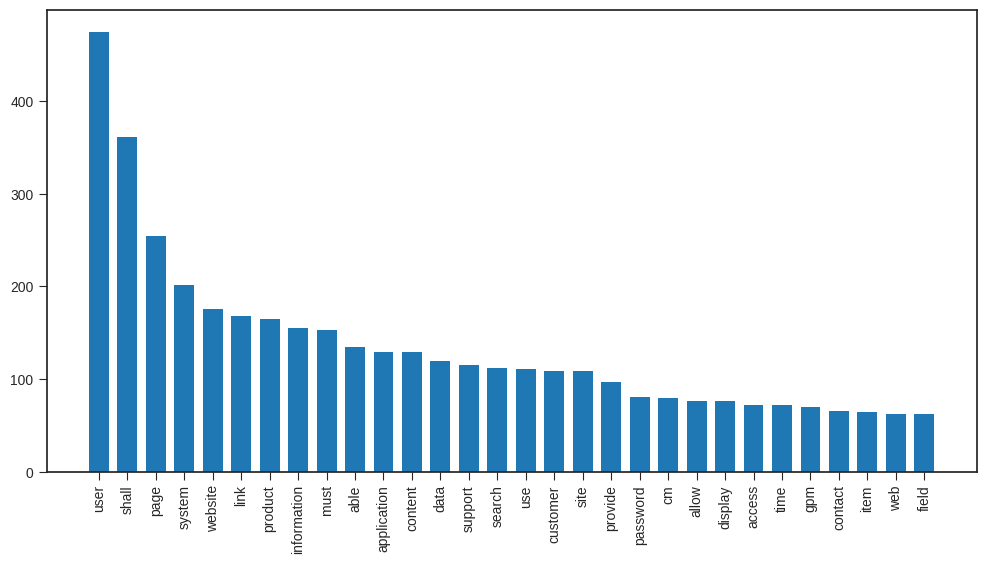

In [232]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
plt.bar(all_words.index.values[:30], all_words.values[:30],width=0.7)

## **Построим облако слов**

Ориентировался на статью: 

https://towardsdatascience.com/simple-wordcloud-in-python-2ae54a9f58e5

In [233]:
# Import package
import matplotlib.pyplot as plt
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

In [234]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


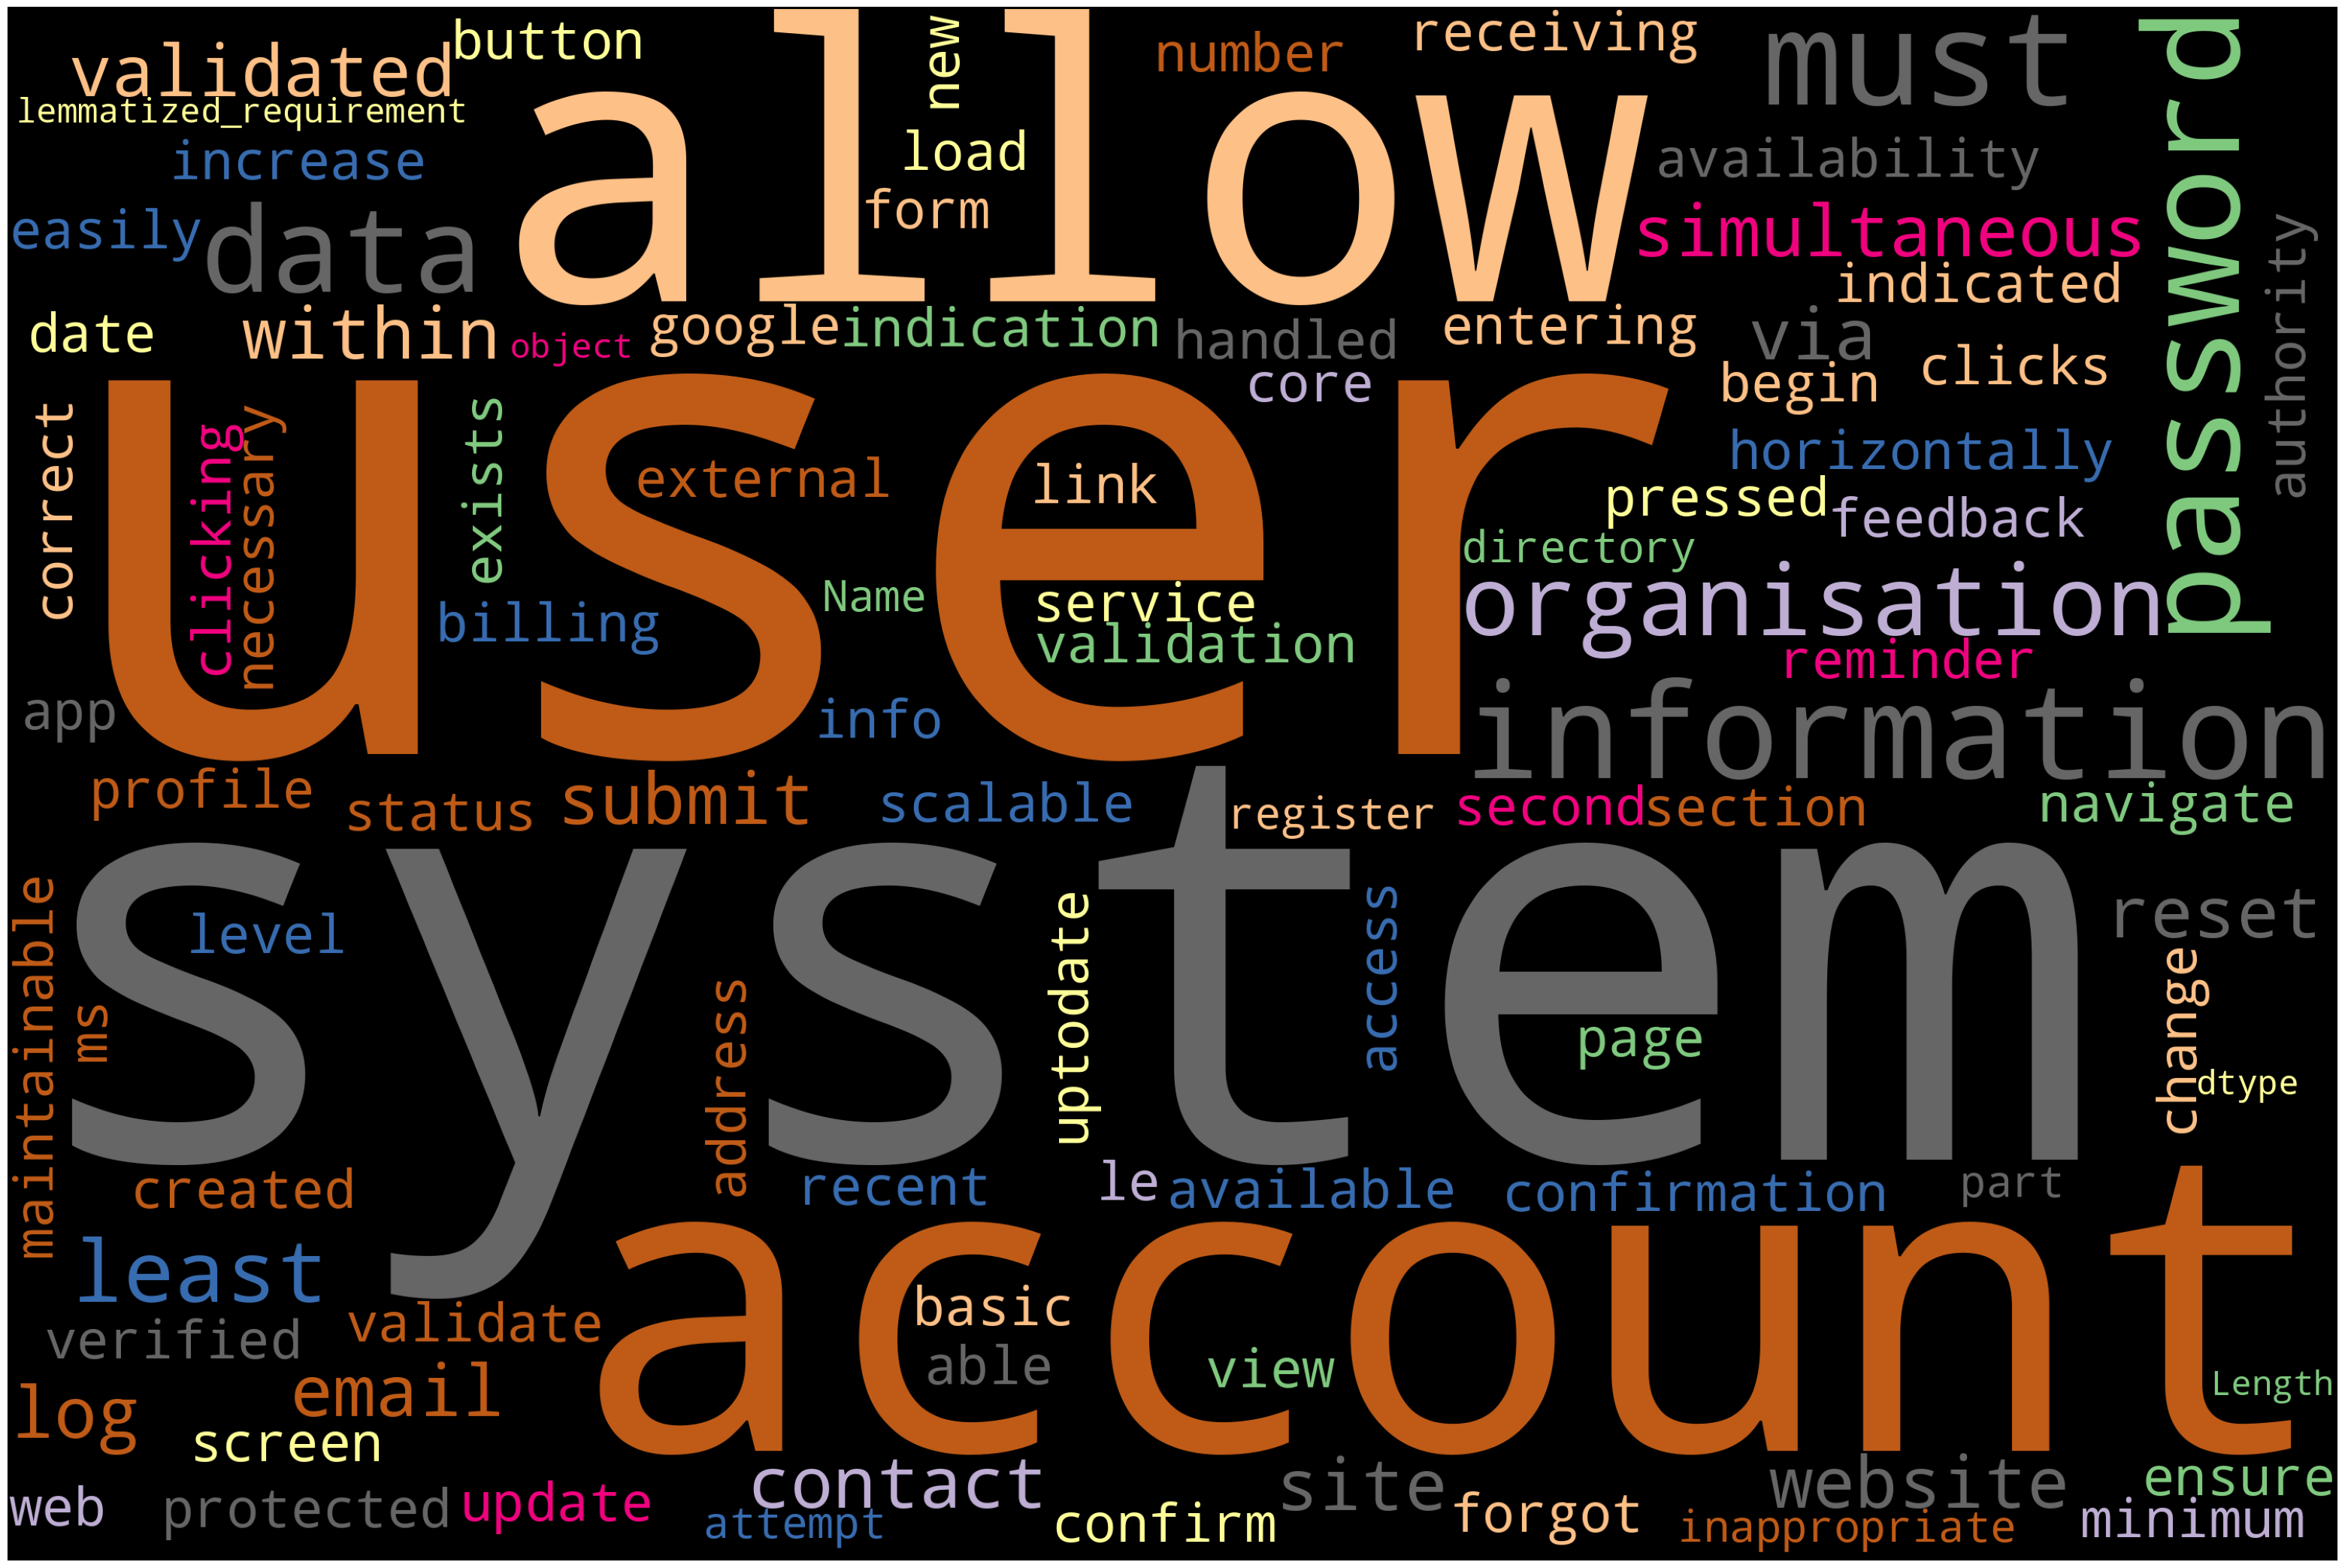

In [235]:
# Import package
from wordcloud import WordCloud
# Generate word cloud
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, colormap='Accent', collocations=False).generate(str(data.lemmatized_requirement))
# Plot
plot_cloud(wordcloud)

впишем облако слов в картинку и поменяем цветовую палитру

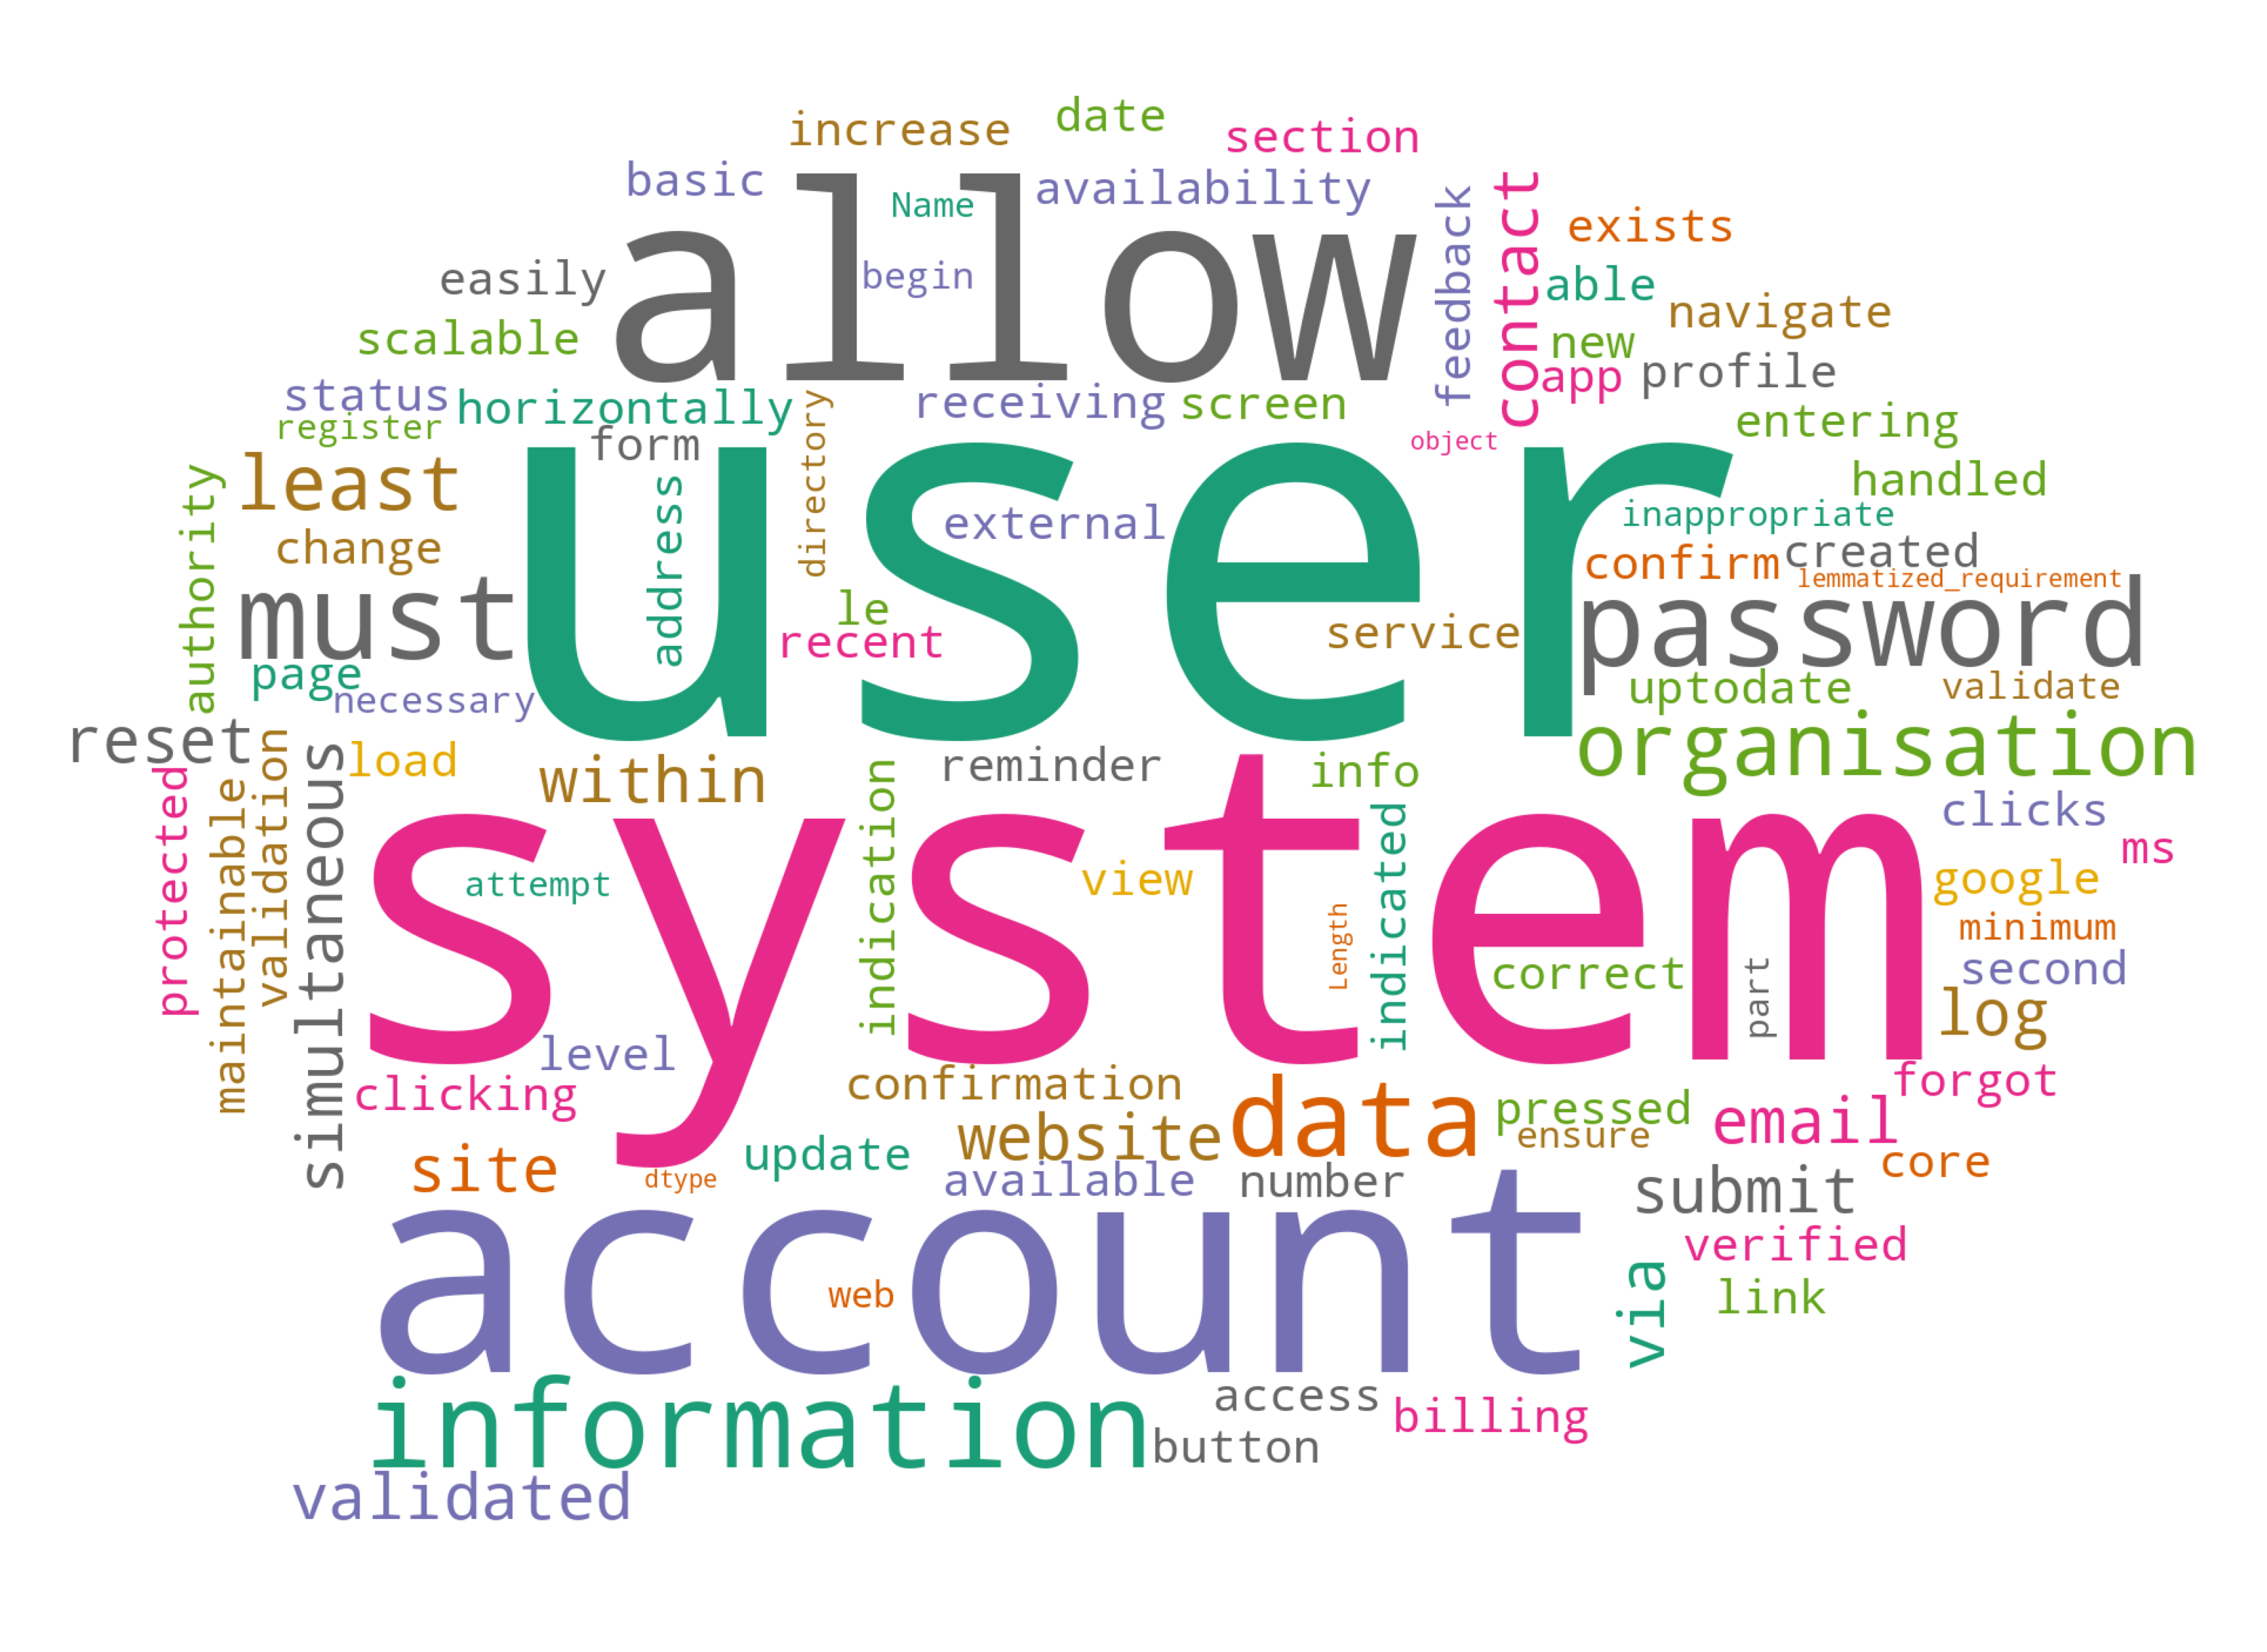

In [237]:
# Import package
import requests
from PIL import Image
import io
from wordcloud import WordCloud
# Generate word cloud

url = 'https://github.com/Khomiakov7706/requirements_analysis/blob/main/comment1.png?raw=true'
response = requests.get(url)
image = Image.open(io.BytesIO(response.content))
mask = np.array(image)

wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='white', colormap='Dark2', collocations=False, mask=mask).generate(str(data.lemmatized_requirement))
# Plot
plot_cloud(wordcloud)

In [ ]:
data.head()

Построим облако слов для класса Verification of Design and Content 

In [ ]:
class1_words = data[data['Verification of Design and Content']==1]['lemmatized_requirement'].str.split(expand=True).unstack().value_counts()
mask = np.array(Image.open('comment1.png'))
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='white', colormap='Dark2', collocations=False, mask=mask).generate(str(class1_words))
# Plot
plot_cloud(wordcloud)

Сопоставим с гистограммой

In [ ]:
class1_words = data[data['Verification of Design and Content']==1]['lemmatized_requirement'].str.split(expand=True).unstack().value_counts()
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
plt.bar(class1_words.index.values[0:30], class1_words.values[0:30],width=0.7)
plt.figure()

In [ ]:
class1_words.head(20)


# Нормализация

In [ ]:
from sklearn import preprocessing

In [ ]:
data[bag_of_word] = preprocessing.normalize(data[bag_of_word])

In [ ]:
data.head()

# Выявление признаков из датасета

Составляем набор признаков на основе текста dataframe

Кол-во слов в тексте требования:

In [ ]:
data['words_in_requirement'] = data['requirement_text'].str.split().apply(len)

Кол-во слов в тексте лемматизированного требования

In [ ]:
data['words_in_lemmatized_req'] = data['lemmatized_requirement'].str.split().apply(len)

Исключено слов при лемматизации

In [ ]:
data['words_diffence'] = data['words_in_requirement']-data['words_in_lemmatized_req']

In [ ]:
data.head(1)

Теперь выведем признаки по словам. Для этого определим самые часто-употребимые слова в каждом классе.

# Разбиение на обучающую и тестовую выборки

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
target = requirement_classes
features = bag_of_word

In [ ]:
data[bag_of_word]

Разбиение на рандомные обучающую и тестовую выборки

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.2, random_state=77)
print('Среднее значение целевой переменной\nОбучающая выборка:', np.round(y_train.mean(),3))
print('Тестовая выборка:', np.round(y_test.mean(),3))

In [ ]:
X_train.count()/(X_train.count()+X_test.count())

Разбиение на стратифицированные обучающую и тестовую выборки по каждому классу

Создать функцию 

вход Dataframe,  целевая колонка, features

выход: X_train, X_test, y_train, y_test

In [ ]:
def split_train_test (dataframe_, target_, features_):
        
        X_train, X_test, y_train, y_test = train_test_split(dataframe_[features_],dataframe_[target_],test_size=0.2, random_state=77, stratify=dataframe_[target_])
        
        return X_train, X_test, y_train, y_test

In [ ]:
#X_train, X_test, y_train, y_test = [],[],[],[]
#for i in range(len(requirement_classes)):
#    X_train[i], X_test[i], y_train[i], y_test[i] = train_test_split(data[features], data[target], test_size=0.2, random_state=77, stratify=data[target[i]])
#    print('Среднее значение целевой переменной\nОбучающая выборка:', np.round(y_train.mean(),3)[i])
#    print('Тестовая выборка:', np.round(y_test.mean(),3)[i])

цикл 
dataframe в список 
[X_train, X_test, y_train, y_test] – значение
ключ - название класса

## Разбиение на тестовую и валидационную выборки для самого большого класса "Verification of Features and Functions"

In [ ]:
data['Verification of Features and Functions'].value_counts()

In [ ]:
X_train, X_test, y_train, y_test = split_train_test(data,'Verification of Features and Functions', class_dict['Verification of Features and Functions'].index)

# Обучение модели

Так как классификация будет проводиться по каждому из классов независимо, разбиение на тестовую и обучающую выборки будет проводиться для каждого из классов отдельно

In [ ]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression() # Используем модель с параметрами по умолчанию
model_lr.fit(X_train, y_train)

In [ ]:
from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB() # Используем модель с параметрами по умолчанию
model_nb.fit(X_train, y_train)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier() # Используем модель с параметрами по умолчанию
model_knn.fit(X_train, y_train)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_dtc = DecisionTreeClassifier() # Используем модель с параметрами по умолчанию
model_dtc.fit(X_train, y_train)

In [ ]:
from sklearn.svm import SVC
model_svc = SVC() # Используем модель с параметрами по умолчанию
model_svc.fit(X_train, y_train)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier() # Используем модель с параметрами по умолчанию
model_rf.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print('Логистическая регрессия')
print('Точность на обучающей выборке: ', accuracy_score(y_train, model_lr.predict(X_train)))
print('Точность на тестовой выборке: ', accuracy_score(y_test, model_lr.predict(X_test)), end='\n\n')

print('Наивный Байес')
print('Точность на обучающей выборке: ', accuracy_score(y_train, model_nb.predict(X_train)))
print('Точность на тестовой выборке: ', accuracy_score(y_test, model_nb.predict(X_test)), end='\n\n')

print('K-ближайших соседей')
print('Точность на обучающей выборке: ', accuracy_score(y_train, model_knn.predict(X_train)))
print('Точность на тестовой выборке: ', accuracy_score(y_test, model_knn.predict(X_test)), end='\n\n')

print('Деревья решений')
print('Точность на обучающей выборке: ', accuracy_score(y_train, model_dtc.predict(X_train)))
print('Точность на тестовой выборке: ', accuracy_score(y_test, model_dtc.predict(X_test)), end='\n\n')

print('Метод опорных векторов')
print('Точность на обучающей выборке: ', accuracy_score(y_train, model_svc.predict(X_train)))
print('Точность на тестовой выборке: ', accuracy_score(y_test, model_svc.predict(X_test)), end='\n\n')

print('Random Forest')
print('Точность на обучающей выборке: ', accuracy_score(y_train, model_rf.predict(X_train)))
print('Точность на тестовой выборке: ', accuracy_score(y_test, model_rf.predict(X_test)), end='\n\n')

In [ ]:
X_test.iloc[0]

In [ ]:
model_svc.predict(X_test)

In [ ]:
X_test.loc[1056]

In [ ]:
y_test

<a id="*3*"></a>
### **Выводы**

1. В используемом dataset данные для задачи берутся из колонки с текстом требования. 
2. В качестве разметки используются колонки классов со значениями типа int64 и принимает 2 значения: '0' или '1'
3. Большинство требований (845) относится к 1 классу, к 2 классам относится 385 требований. К 8, 9, 10 классам отноится по 1 требованию.
4. Некоторые классы требований представлены на порядок большим количеством требований, чем другие:

    Verification of Features and Functions   325

    Verification of Account Details and Settings   21
4. Нужна ли кросс-валидация?.. – метод-гипотеза


**TO DO**


*   Посмотреть, есть или зависимость от количества слов и классов
*   Посмотреть зависимость количество встречаемых слов для разных классов



